# Histograms

## Read data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
import us

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
df = pd.read_csv("../data/Mass Shootings Dataset Ver 2 clean.csv", encoding = "ISO-8859-1", parse_dates=["Date"])

In [4]:
df.columns

Index(['S#', 'Title', 'Date', 'Fatalities', 'Injured', 'Total victims',
       'Mental Health Issues', 'Race', 'Gender', 'Latitude', 'Longitude',
       'Cities', 'State', 'Gun law', 'Party affiliation', 'Population'],
      dtype='object')

## Input Data

In [5]:
histogram_columns = ['Fatalities', 'Injured', 'Total victims', 'Mental Health Issues',
                     'Race', 'Gender', 'Gun law', 'Party affiliation']

In [6]:
def plot_histogram(title, selector):
    column = selector.value_counts()
    
    plt.xticks(rotation=45)
    if isinstance(column.index[0], str):
        column.index = [c.replace(' ', '\n') for c in column.index]
    
    sns.barplot(column.index, column.values)
    plt.title(title)
    plt.show()

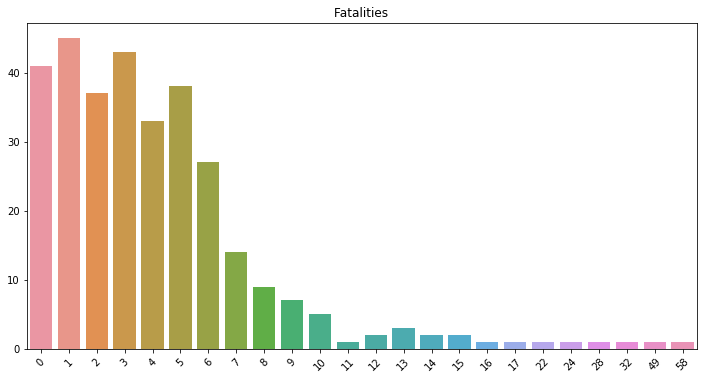

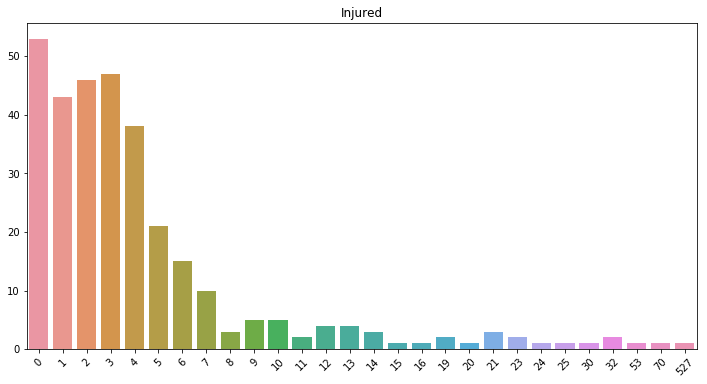

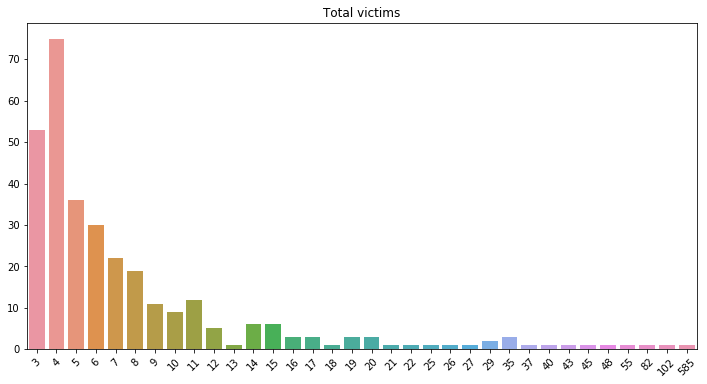

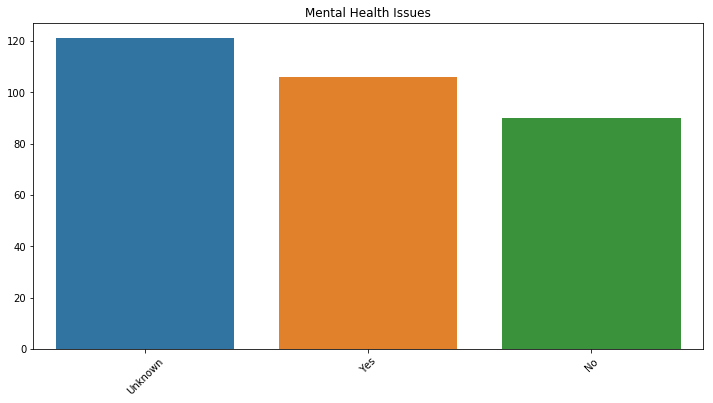

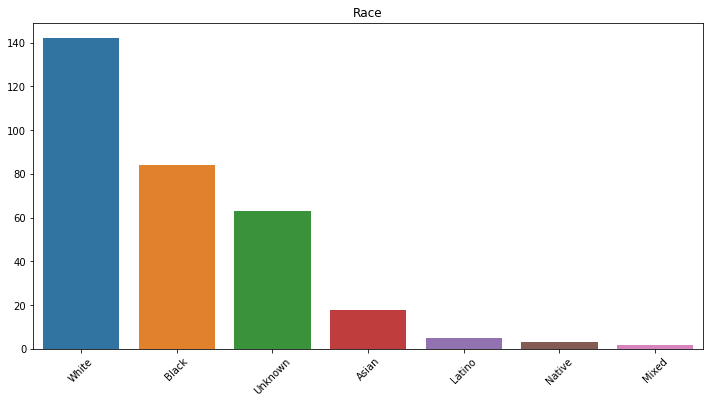

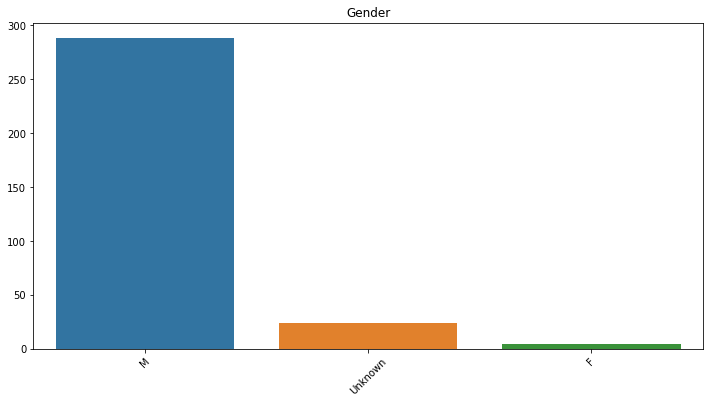

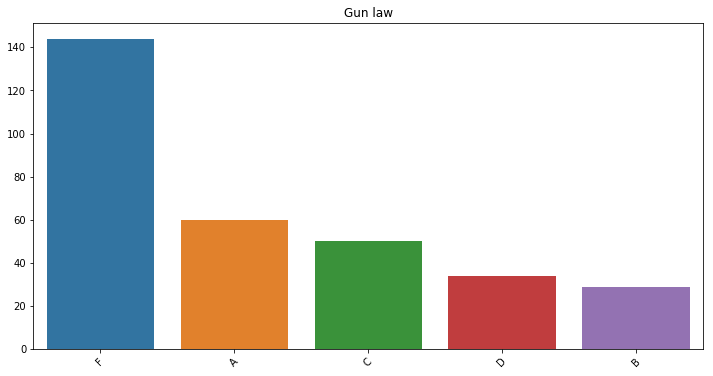

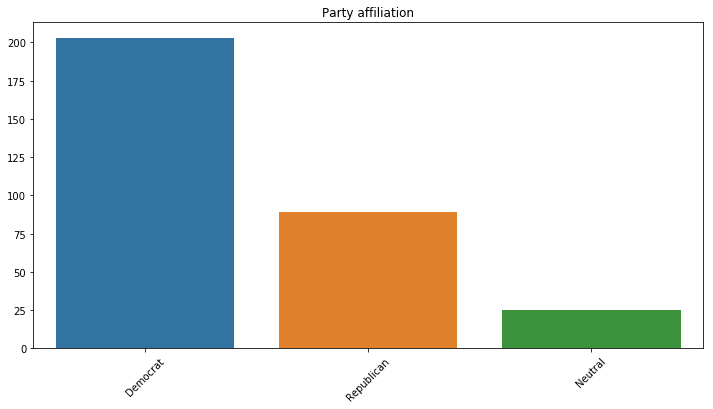

In [7]:
for column_name in histogram_columns:
    selector = df[column_name]
    plot_histogram(column_name, selector)

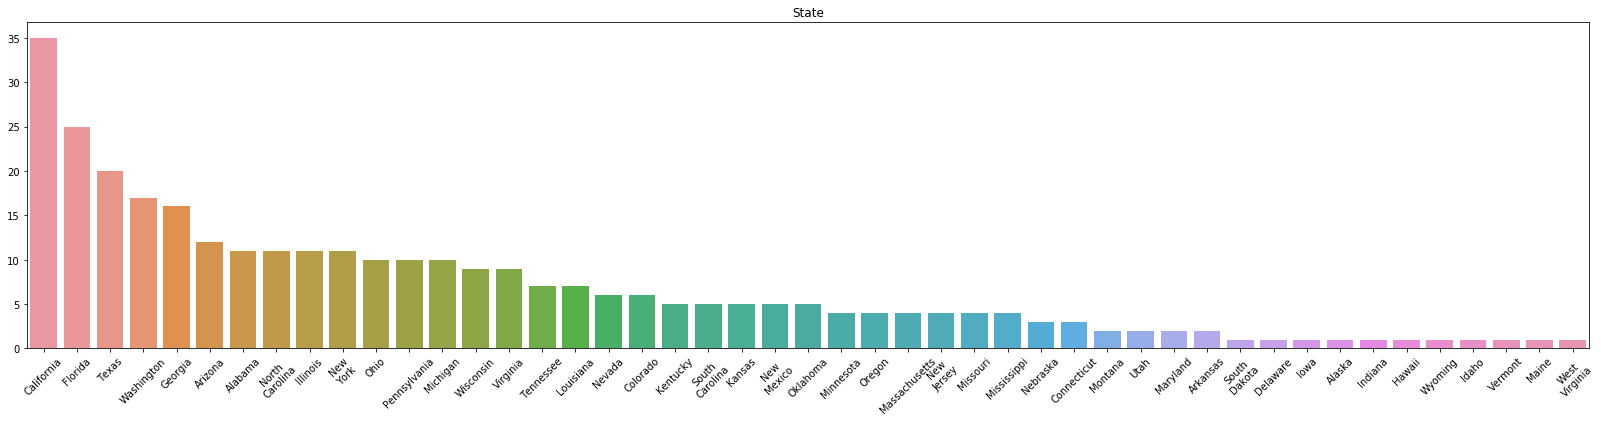

In [8]:
plt.figure(figsize=(28, 6))
plot_histogram('State', df['State'])

## Exploration

### Dates

In [9]:
spring = (df.Date.dt.dayofyear >= 79) & (df.Date.dt.dayofyear < 172)
summer = (df.Date.dt.dayofyear >= 172) & (df.Date.dt.dayofyear < 265)
fall = (df.Date.dt.dayofyear >= 265) & (df.Date.dt.dayofyear < 355)
winter = (df.Date.dt.dayofyear >= 355) | (df.Date.dt.dayofyear < 79)

df['Season'] = ''

df.Season[spring] = 'Spring'
df.Season[summer] = 'Summer'
df.Season[winter] = 'Winter'
df.Season[fall] = 'Fall'

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWit

In [10]:
workweek = df.Date.dt.dayofweek.isin([0, 1, 2, 3])
weekend = df.Date.dt.dayofweek.isin([4, 5, 6])

df['DayType'] = ''

df.DayType[workweek] = 'Workweek'
df.DayType[weekend] = 'Weekend'

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
holidays = calendar().holidays(start=df.Date.min(), end=df.Date.max())
holiday = df.Date.isin(holidays)

df['Holiday'] = ''

df.Holiday[holiday] = 'Holiday'
df.Holiday[~holiday] = 'Regular Day'

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/maciej/miniconda3/envs/ed/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
time = {
    'Year': df.Date.dt.year,
    'Month': df.Date.dt.month,
    'Day': df.Date.dt.day,
    'Weekday': df.Date.dt.weekday_name,
    'Season': df.Season,
    'DayType': df.DayType,
    'Holiday': df.Holiday
}

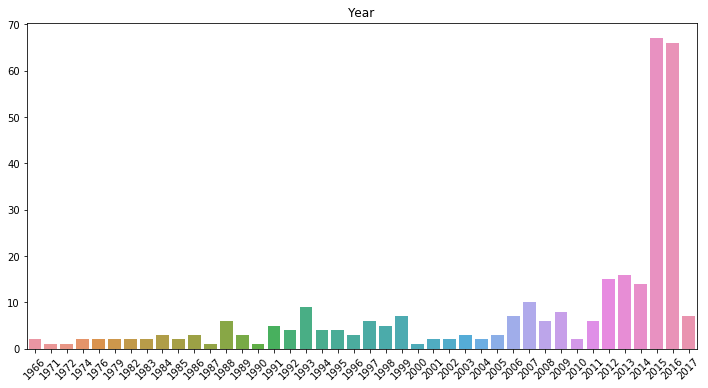

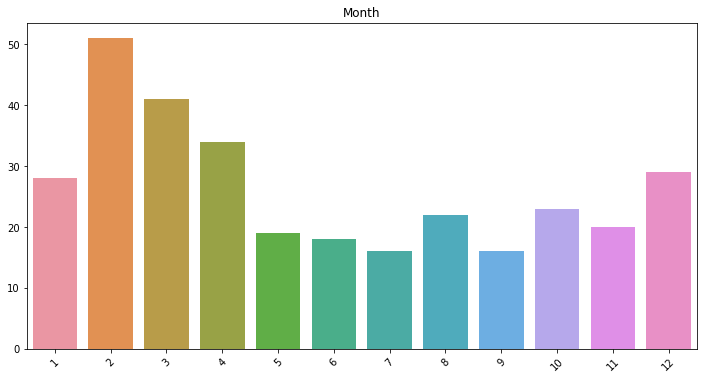

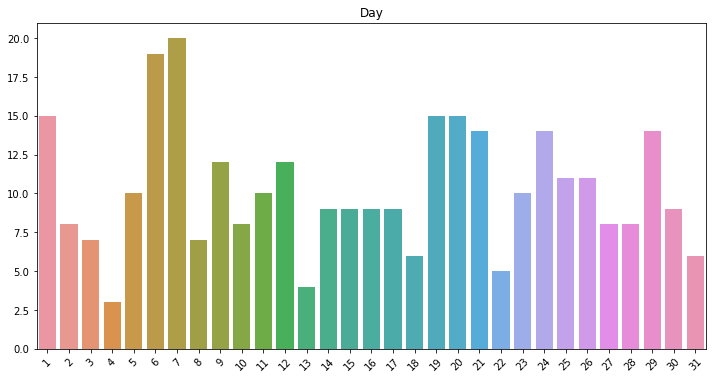

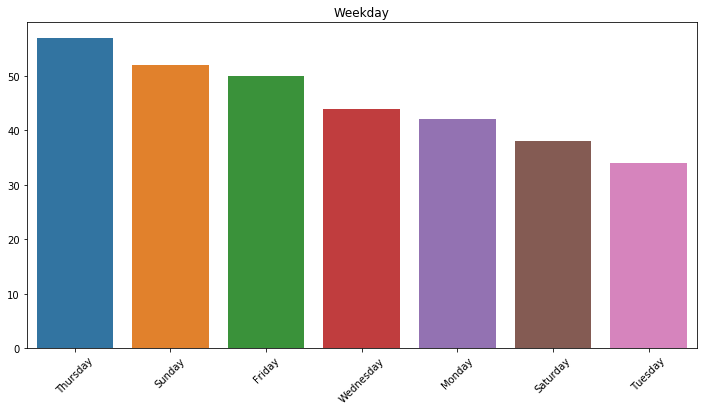

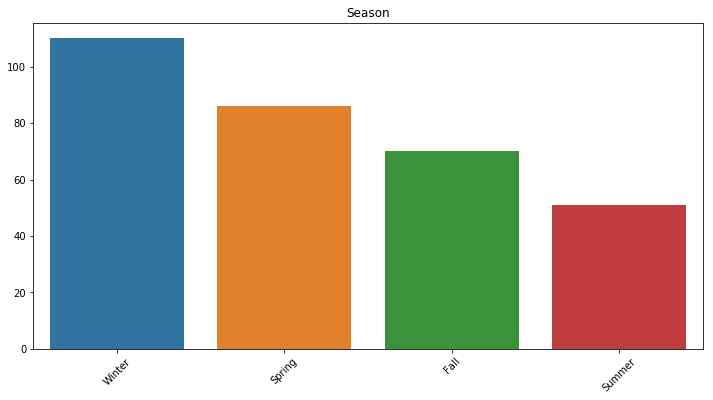

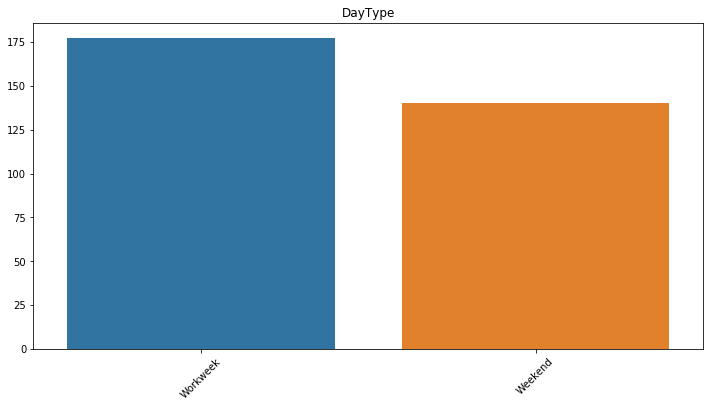

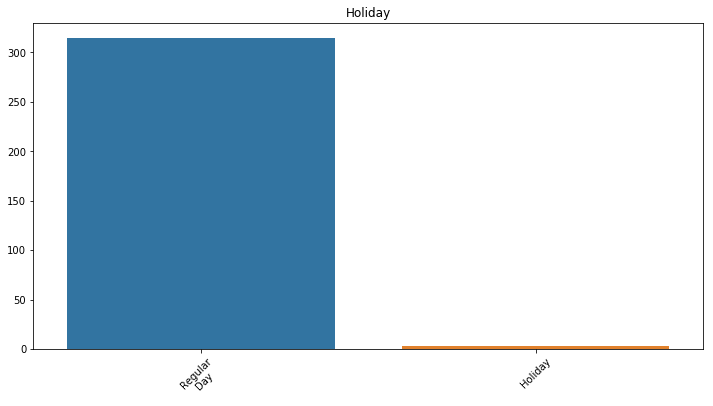

In [13]:
for title, selector in time.items():
    plot_histogram(title, selector)

## Time series

In [14]:
values_by_date = df.sort_values('Date')
dates = values_by_date.Date.values

In [15]:
def plot_time_series(title, values, scale='linear'):    
    plt.plot(dates, values, '.')
    plt.ylabel(f'{scale}')
    plt.yscale(scale)
    plt.title(title)
    plt.show()

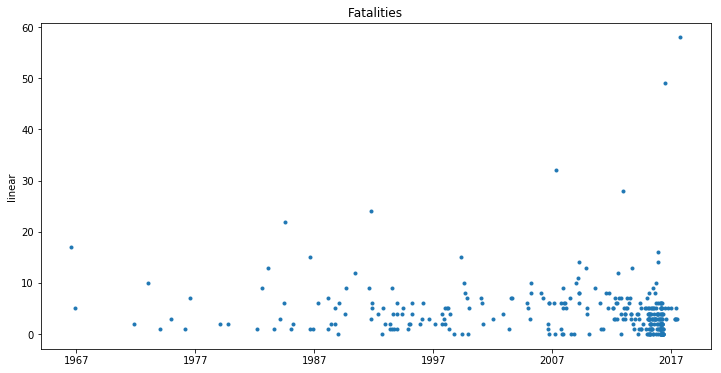

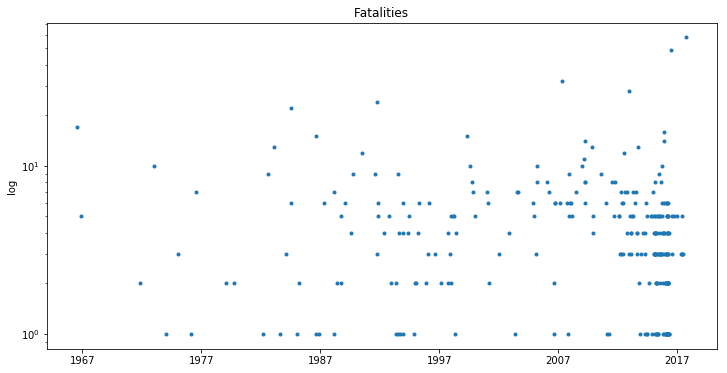

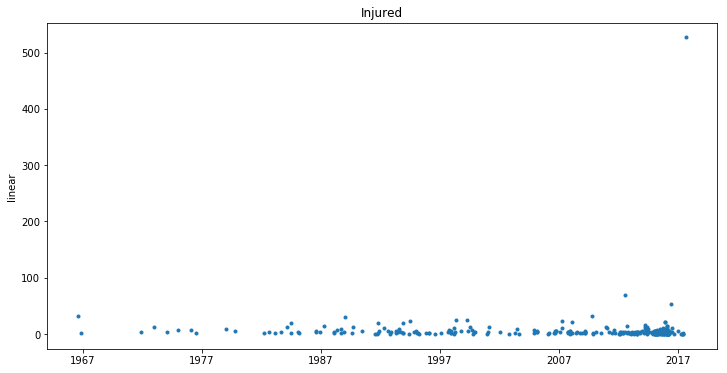

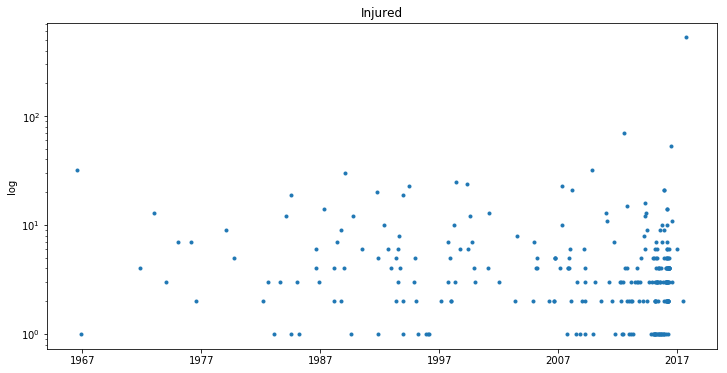

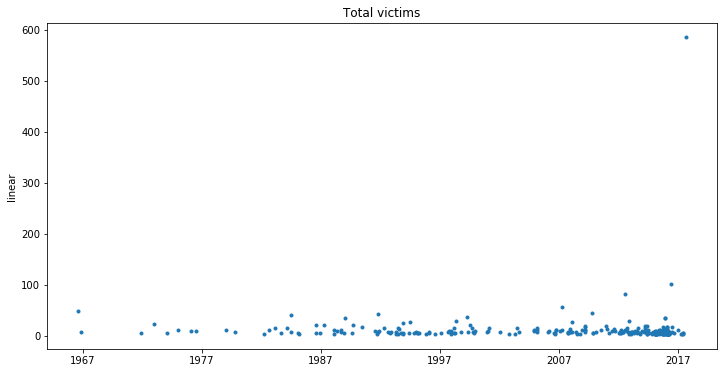

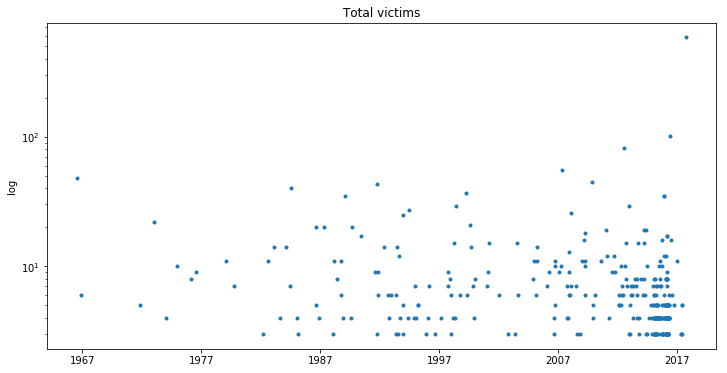

In [16]:
time_series_columns = ['Fatalities', 'Injured', 'Total victims']

for column_name in time_series_columns:
    plot_time_series(column_name, values_by_date[column_name].values)
    plot_time_series(column_name, values_by_date[column_name].values, scale='log')

### Map

In [17]:
def plot_states_map(title, state_names, values):
    state_index_codes = list(
        map(lambda name: us.states.lookup(name).abbr, state_names)
    )

    data = [
        dict(
            type='choropleth',
            locationmode='USA-states',
            locations=state_index_codes,
            z=values
        )
    ]

    layout = dict(
        title=title,
        geo=dict(
            scope='usa'
        )
    )
    
    figure = dict(data=data, layout=layout)
    return plotly.plotly.iplot(figure, filename=title)

In [18]:
state_counts = df.groupby('State').Fatalities.count()
plot_states_map('Incidents count', state_counts.index, df.State.value_counts().values)

In [19]:
df.groupby('State') \
    .agg([np.min, np.mean, np.median, np.max, np.std, np.sum]) \
    [['Fatalities', 'Injured', 'Total victims']].T

State                   Alabama  Alaska    Arizona   Arkansas  California  \
Fatalities    amin     0.000000     2.0   0.000000   0.000000    0.000000   
              mean     2.909091     2.0   3.916667   2.500000    5.142857   
              median   2.000000     2.0   4.500000   2.500000    4.000000   
              amax    11.000000     2.0   9.000000   5.000000   22.000000   
              std      3.015113     NaN   2.503028   3.535534    4.753592   
              sum     32.000000     2.0  47.000000   5.000000  180.000000   
Injured       amin     0.000000     2.0   0.000000   1.000000    0.000000   
              mean     2.818182     2.0   2.583333   5.500000    6.371429   
              median   3.000000     2.0   1.000000   5.500000    3.000000   
              amax     6.000000     2.0  13.000000  10.000000   30.000000   
              std      1.721522     NaN   3.800917   6.363961    7.096336   
              sum     31.000000     2.0  31.000000  11.000000  223.000000   
Total victims amin     3.000000     4.0   3.000000   3.000000    3.000000   
              mean     5.636364     4.0   6.083333   9.000000   11.200000   
              median   4.000000     4.0   4.000000   9.000000    8.000000   
              amax    16.000000     4.0  19.000000  15.000000   40.000000   
              std      3.775519     NaN   4.521833   8.485281    9.907810   
              sum     62.000000     4.0  73.000000  18.000000  392.000000   

State                   Colorado  Connecticut  Delaware     Florida  \
Fatalities    amin      3.000000     5.000000       1.0    0.000000   
              mean      7.166667    14.000000       1.0    5.120000   
              median    4.500000     9.000000       1.0    3.000000   
              amax     15.000000    28.000000       1.0   49.000000   
              std       5.036533    12.288206       NaN    9.640712   
              sum      43.000000    42.000000       1.0  128.000000   
Injured       amin      0.000000     0.000000       4.0    0.000000   
              mean     18.166667     1.333333       4.0    6.080000   
              median    7.000000     2.000000       4.0    3.000000   
              amax     70.000000     2.000000       4.0   53.000000   
              std      26.843373     1.154701       NaN   10.551145   
              sum     109.000000     4.000000       4.0  152.000000   
Total victims amin      3.000000     4.000000       5.0    3.000000   
              mean     24.666667    14.666667       5.0   11.000000   
              median   10.500000    11.000000       5.0    5.000000   
              amax     82.000000    29.000000       5.0  102.000000   
              std      30.663768    12.897028       NaN   19.527758   
              sum     148.000000    44.000000       5.0  275.000000   

State                   Georgia   ...     South Dakota  Tennessee       Texas  \
Fatalities    amin     0.000000   ...              6.0   0.000000    0.000000   
              mean     2.625000   ...              6.0   1.857143    6.250000   
              median   2.000000   ...              6.0   2.000000    4.000000   
              amax    10.000000   ...              6.0   5.000000   24.000000   
              std      2.704934   ...              NaN   1.772811    5.766281   
              sum     42.000000   ...              6.0  13.000000  125.000000   
Injured       amin     0.000000   ...              0.0   1.000000    0.000000   
              mean     3.562500   ...              0.0   2.714286    7.700000   
              median   2.000000   ...              0.0   3.000000    4.000000   
              amax    12.000000   ...              0.0   5.000000   32.000000   
              std      3.424787   ...              NaN   1.496026   10.094814   
              sum     57.000000   ...              0.0  19.000000  154.000000   
Total victims amin     3.000000   ...              5.0   3.000000    3.000000   
              mean     5.750000   ...              5

In [20]:
median_fatalities = df.groupby('State').Fatalities.median()
plot_states_map('Median Fatalities', median_fatalities.index, median_fatalities.values)

In [21]:
median_injured = df.groupby('State').Injured.median()
plot_states_map('Median injured', median_injured.index, median_injured.values)

In [22]:
median_total_victims = df.groupby('State')['Total victims'].median()
plot_states_map('Median Total Victims', median_total_victims.index, median_total_victims.values)

In [23]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Weekday'] = df.Date.dt.weekday_name

In [24]:
df.to_csv("../data/Mass Shootings Dataset Ver 2 clean + time.csv", encoding = "ISO-8859-1", index=False)